In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from NeuralTract import NeuralTract
from SynapsesFactory import SynapsesFactory

In [2]:
conf = Configuration('confMNPoolWithNodeAxonsAnsDescendingCommand.rmto')
conf.simDuration_ms = 100 # Here I change simulation duration without changing the Configuration file.

In [3]:
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
#pools[1] = NeuralTract(conf, 'CMExt')
Syn = SynapsesFactory(conf, pools)
del Syn

Motor Unit Pool SOL built
Synaptic Noise on RC built
All the 0 synapses were built


In [4]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [5]:
axonV = np.zeros((len(t), pools[0].unit[0].compNumber))


tic = time.clock()
for i in xrange(0, len(t)-1):
    #pools[1].atualizePool(t[i])
    for j in xrange(len(pools[0].unit)):
        pools[0].unit[j].iInjected = 10
    pools[0].atualizeMotorUnitPool(t[i])
    axonV[i,:] = pools[0].unit[0].v_mV
toc = time.clock()
print str(toc - tic) + ' seconds'

3613.806059 seconds


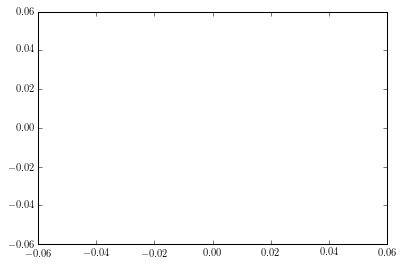

In [6]:
pools[0].listSpikes()
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
         pools[0].poolTerminalSpikes[:, 1]+1, '.')

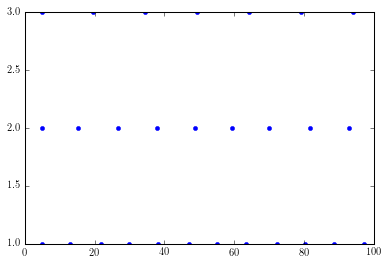

In [7]:
plt.figure()
plt.plot(pools[0].poolSomaSpikes[:, 0],
         pools[0].poolSomaSpikes[:, 1]+1, '.')

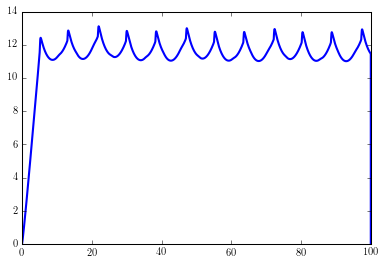

In [8]:
plt.figure()
plt.plot(t, axonV[:,0], '-')

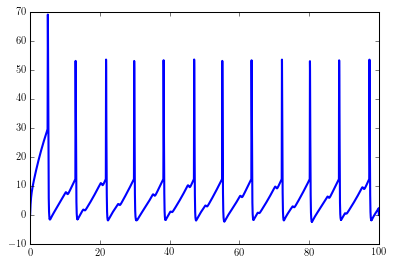

In [9]:
plt.figure()
plt.plot(t, axonV[:,1], '-')
    

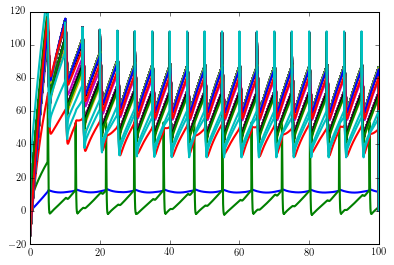

In [10]:
plt.figure()
plt.plot(t, axonV, '-')

In [11]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

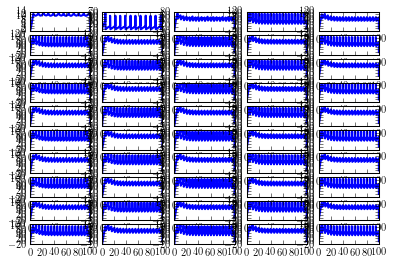

In [12]:
fig = plt.figure()
gs = gridspec.GridSpec(10, 5)
h = dict()
for i in xrange(50):
    h[i] = fig.add_subplot(gs[i])
    h[i].plot(t,axonV[:,i])
fig = plt.gcf()

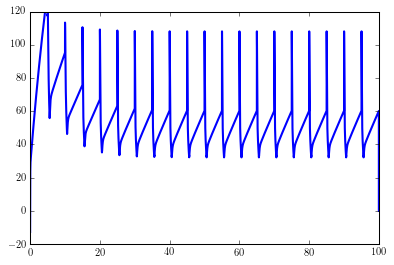

In [23]:
plt.figure()
plt.plot(t, axonV[:,101], '-')
